In [1]:
%matplotlib inline
import numpy as np
import torch
import torch.optim as optim

In [2]:
# prepare the data
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1) # <1>
t_u = torch.tensor(t_u).unsqueeze(1) # <1>

t_u.shape

torch.Size([11, 1])

In [3]:
# split data into training and validation
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices

(tensor([ 2,  8,  1,  4,  5,  3,  7, 10,  6]), tensor([0, 9]))

In [4]:
t_u_train = t_u[train_indices]
t_c_train = t_c[train_indices]

t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]

t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val

In [5]:
import torch.nn as nn
# we are defining only one layer of neuron, no activation. This is identical to the linear regression model we developed.
linear_model = nn.Linear(1, 1) # <1>
# doing one forward pass with this model
linear_model(t_un_val) # notice we don't need to pass parameters explicitly

tensor([[-3.5181],
        [-5.8557]], grad_fn=<AddmmBackward0>)

In [6]:
# check the initial values of the parameters
linear_model.weight

Parameter containing:
tensor([[-0.9464]], requires_grad=True)

In [7]:
# check the initial values of the parameters
linear_model.bias

Parameter containing:
tensor([-0.1393], requires_grad=True)

In [8]:
linear_model = nn.Linear(1, 1) # <1>
optimizer = optim.SGD(
    linear_model.parameters(), # <2>
    lr=1e-2)

In [9]:
def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val,
                  t_c_train, t_c_val):
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(t_u_train) # <1>
        loss_train = loss_fn(t_p_train, t_c_train)

        t_p_val = model(t_u_val) # <1>
        loss_val = loss_fn(t_p_val, t_c_val)

        optimizer.zero_grad()
        loss_train.backward() # <2>
        optimizer.step()

        if epoch == 1 or epoch % 1000 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                  f" Validation loss {loss_val.item():.4f}")


In [10]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

linear_model = nn.Linear(1, 1) # <1>
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

training_loop(
    n_epochs = 3000,
    optimizer = optimizer,
    model = linear_model,
    loss_fn = loss_fn,
    t_u_train = t_un_train,
    t_u_val = t_un_val,
    t_c_train = t_c_train,
    t_c_val = t_c_val)

print()
print(linear_model.weight)
print(linear_model.bias)

Epoch 1, Training loss 210.0702, Validation loss 85.1405
Epoch 1000, Training loss 3.4700, Validation loss 6.9099
Epoch 2000, Training loss 2.7465, Validation loss 4.9744
Epoch 3000, Training loss 2.7254, Validation loss 4.7271

Parameter containing:
tensor([[5.3270]], requires_grad=True)
Parameter containing:
tensor([-16.6970], requires_grad=True)


In [11]:
# use a built-in loss function
linear_model = nn.Linear(1, 1)
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

training_loop(
    n_epochs = 3000,
    optimizer = optimizer,
    model = linear_model,
    loss_fn = nn.MSELoss(), # <1>
    t_u_train = t_un_train,
    t_u_val = t_un_val,
    t_c_train = t_c_train,
    t_c_val = t_c_val)

print()
print(linear_model.weight)
print(linear_model.bias)

Epoch 1, Training loss 162.8311, Validation loss 60.7983
Epoch 1000, Training loss 3.4228, Validation loss 6.8191
Epoch 2000, Training loss 2.7452, Validation loss 4.9644
Epoch 3000, Training loss 2.7254, Validation loss 4.7256

Parameter containing:
tensor([[5.3274]], requires_grad=True)
Parameter containing:
tensor([-16.6996], requires_grad=True)


In [12]:
# add activation layers
seq_model = nn.Sequential(
            nn.Linear(1, 13), # <1>
            nn.Tanh(),
            nn.Linear(13, 1)) # <2>
seq_model

Sequential(
  (0): Linear(in_features=1, out_features=13, bias=True)
  (1): Tanh()
  (2): Linear(in_features=13, out_features=1, bias=True)
)

In [13]:
[param.shape for param in seq_model.parameters()]

[torch.Size([13, 1]), torch.Size([13]), torch.Size([1, 13]), torch.Size([1])]

In [14]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

0.weight torch.Size([13, 1])
0.bias torch.Size([13])
2.weight torch.Size([1, 13])
2.bias torch.Size([1])


In [15]:
from collections import OrderedDict

seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, 8)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(8, 1))
]))

seq_model

Sequential(
  (hidden_linear): Linear(in_features=1, out_features=8, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=8, out_features=1, bias=True)
)

In [16]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

hidden_linear.weight torch.Size([8, 1])
hidden_linear.bias torch.Size([8])
output_linear.weight torch.Size([1, 8])
output_linear.bias torch.Size([1])


In [17]:
seq_model.output_linear.bias

Parameter containing:
tensor([0.0294], requires_grad=True)

In [18]:
optimizer = optim.SGD(seq_model.parameters(), lr=1e-3) # <1>

training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val,
    t_c_train = t_c_train,
    t_c_val = t_c_val)

print('output', seq_model(t_un_val))
print('answer', t_c_val)
print('hidden', seq_model.hidden_linear.weight.grad)

Epoch 1, Training loss 225.3337, Validation loss 93.6982
Epoch 1000, Training loss 4.3864, Validation loss 4.3747
Epoch 2000, Training loss 3.8056, Validation loss 0.8366
Epoch 3000, Training loss 1.9236, Validation loss 2.3925
Epoch 4000, Training loss 1.5049, Validation loss 3.3508
Epoch 5000, Training loss 1.3992, Validation loss 3.7075
output tensor([[ 2.3054],
        [16.1761]], grad_fn=<AddmmBackward0>)
answer tensor([[ 0.5000],
        [13.0000]])
hidden tensor([[ -0.4326],
        [  0.3480],
        [ 10.1934],
        [  0.5022],
        [-10.6329],
        [  0.0904],
        [-11.3205],
        [-11.0188]])


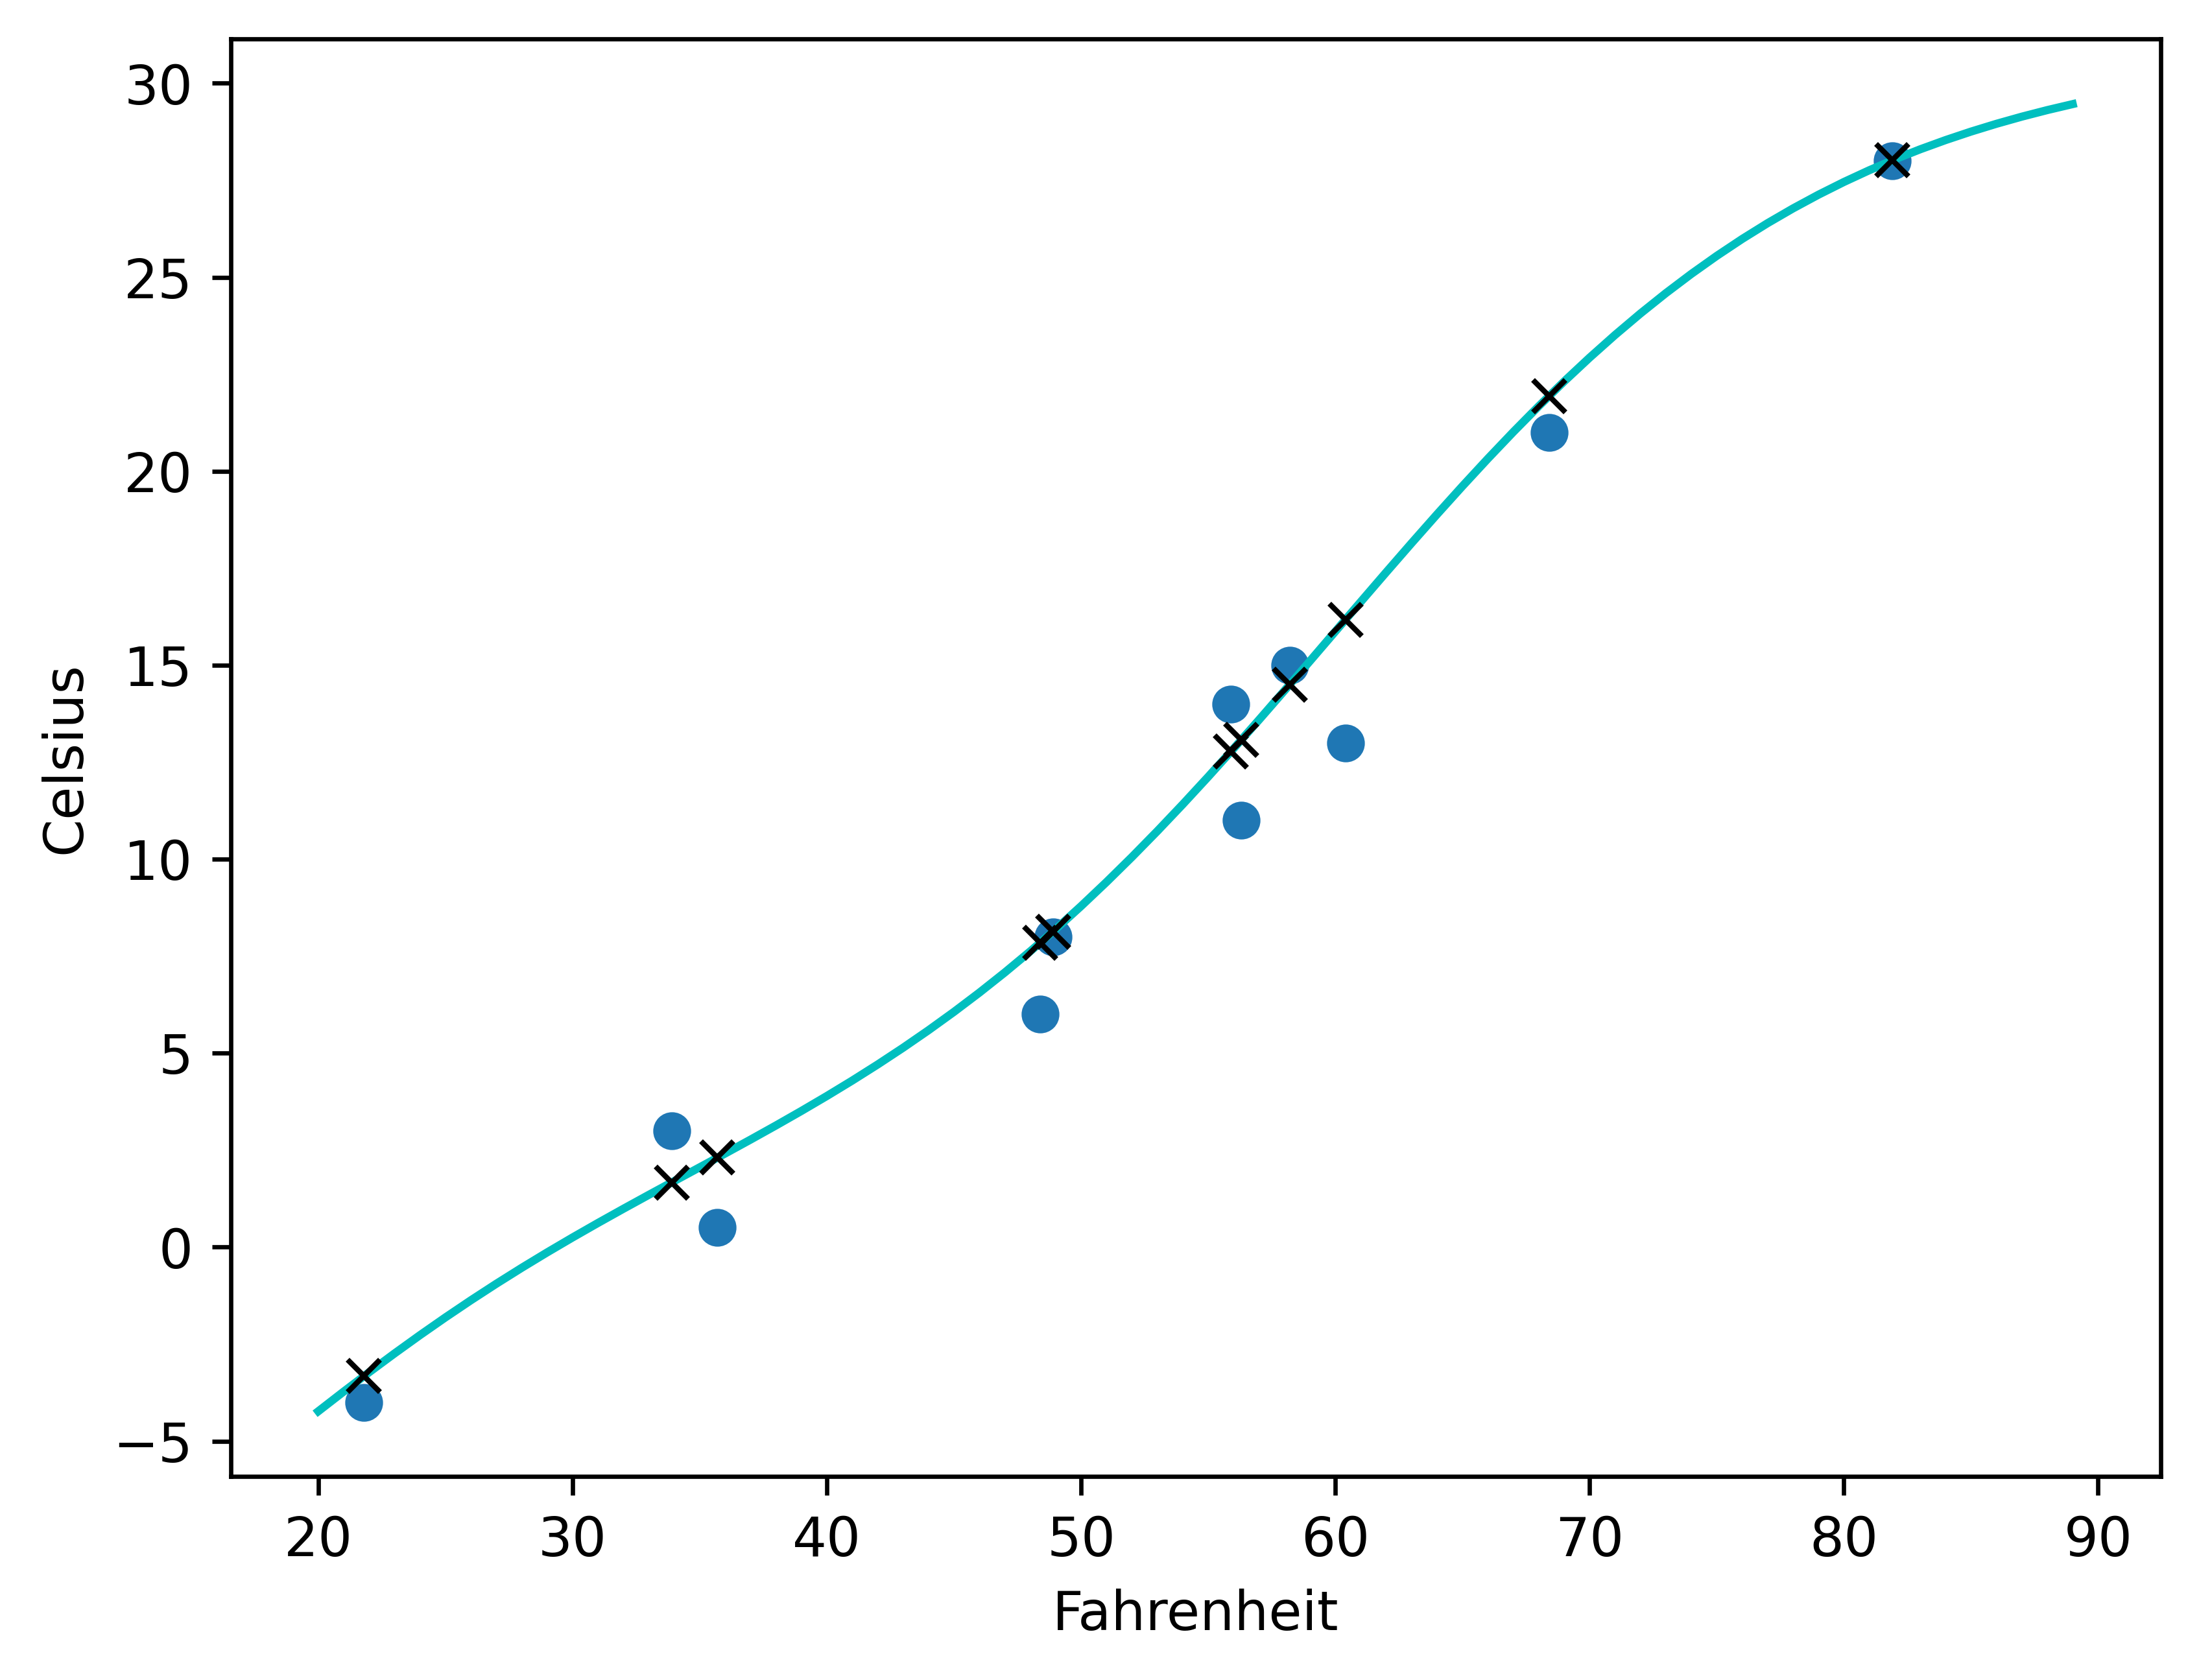

In [19]:
from matplotlib import pyplot as plt

t_range = torch.arange(20., 90.).unsqueeze(1)

fig = plt.figure(dpi=600)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')


Epoch 1, Training loss 202.8330, Validation loss 80.5344
Epoch 1000, Training loss 62.4163, Validation loss 45.3451
Epoch 2000, Training loss 45.9081, Validation loss 35.1507
Epoch 3000, Training loss 29.2944, Validation loss 21.6208
Epoch 4000, Training loss 17.7259, Validation loss 12.8958
Epoch 5000, Training loss 10.7978, Validation loss 8.1797


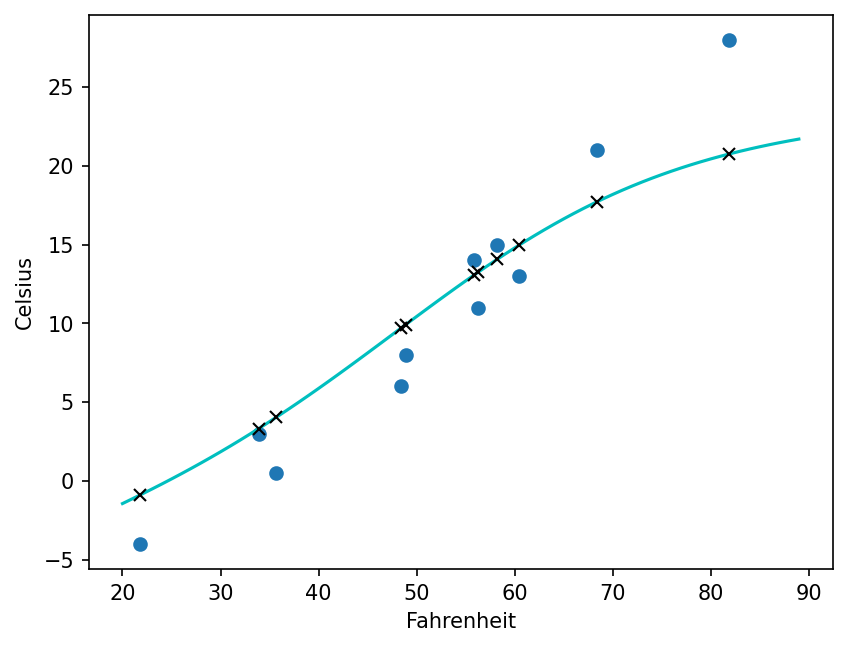

In [21]:
# Exercises here!

neuron_count = 20
# try yourself: rewrite the seq_model for a neuron count of 20 instead of 13
# seq_model =
seq_model = nn.Sequential(
            nn.Linear(1, 20), # <1>
            nn.Tanh(),
            nn.Linear(20, 1)) # <2>
seq_model

optimizer = optim.SGD(seq_model.parameters(), lr=1e-4)

training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val,
    t_c_train = t_c_train,
    t_c_val = t_c_val)

from matplotlib import pyplot as plt

t_range = torch.arange(20., 90.).unsqueeze(1)

fig = plt.figure(dpi=150)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')
